# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [19]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient
%matplotlib inline
from datetime import datetime, timedelta
load_dotenv()

[nltk_data] Downloading package vader_lexicon to C:\Users\Epic Gaming
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")

In [21]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)



In [37]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q='bitcoin',
                                          language='en'
                                          )


btc_news['articles']
                                    

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Richard Lawler',
  'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
  'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
  'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
  'publishedAt': '2021-11-05T13:32:14Z',
  'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'},


In [38]:
bitcoin_df = pd.DataFrame.from_dict(btc_news["articles"])
bitcoin_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,A fake press release claiming Kroger accepts c...,A crypto hoax claimed Kroger is accepting Bitc...,https://www.theverge.com/2021/11/5/22765098/kr...,https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--m...,2021-11-05T13:32:14Z,A similar hoax earlier this year tied Walmart ...
1,"{'id': None, 'name': 'Gizmodo.com'}",Molly Taft,Bitcoin Miners Are Gobbling Up U.S. Energy,There’s a big new presence slurping up power f...,https://gizmodo.com/bitcoin-miners-are-gobblin...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-28T16:45:00Z,Theres a big new presence slurping up power fr...
2,"{'id': None, 'name': 'Gizmodo.com'}",Tom McKay,Roughly One-Third of Bitcoin Is Controlled by ...,"For all the talk of democratizing finance, the...",https://gizmodo.com/roughly-one-third-of-bitco...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-26T18:10:00Z,"For all the talk of democratizing finance, the..."
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Bitcoin edges off all-time high but momentum f...,Bitcoin fell slightly in Asian hours on Thursd...,https://www.reuters.com/business/finance/bitco...,https://www.reuters.com/resizer/oQVnjJsX498T8j...,2021-10-21T03:27:00Z,Representation of cryptocurrency Bitcoin is pl...
4,"{'id': 'reuters', 'name': 'Reuters'}",None,Riding the crypto rollercoaster: Bitcoin nears...,"Bitcoin is on the cusp of an all-time high, it...",https://www.reuters.com/technology/riding-cryp...,https://www.reuters.com/resizer/dTT3e1T05rswsP...,2021-10-20T09:47:00Z,A representation of the virtual cryptocurrency...
5,"{'id': 'reuters', 'name': 'Reuters'}",None,Bitcoin sits below all-time high after U.S. ET...,Bitcoin hovered below record levels on Wednes...,https://www.reuters.com/technology/bitcoin-sit...,https://www.reuters.com/resizer/6SrJPhlyYOAq39...,2021-10-20T04:03:00Z,A representation of the virtual cryptocurrency...
6,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Editorial,"Bitcoin tops $67,000 in record high - Reuters.com",Bitcoin climbed to a record high on Wednesday ...,https://www.reuters.com/video/watch/idOVEZYY6Q3,https://static.reuters.com/resources/r/?d=2021...,2021-10-20T21:23:09Z,Posted \r\nBitcoin climbed to a record high on...
7,"{'id': 'reuters', 'name': 'Reuters'}",None,Bitcoin nears record high ahead of futures ETF...,Bitcoin hit a six-month high and was within st...,https://www.reuters.com/technology/bitcoin-nea...,https://www.reuters.com/resizer/jm8iK4NjlOkVWr...,2021-10-19T07:06:00Z,A representation of the virtual cryptocurrency...
8,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Bitcoin nears record high ahead of futures ETF...,Bitcoin hit a six-month high and was within st...,https://www.reuters.com/article/fintech-crypto...,https://static.reuters.com/resources/r/?m=02&d...,2021-10-19T07:02:00Z,By Reuters Staff\r\nSINGAPORE (Reuters) - Bitc...
9,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Carla Mozée),The first-ever bitcoin ETF will start trading ...,The arrival of the bitcoin-futures ETF comes a...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-18T13:53:14Z,STR/NurPhoto via Getty Images\r\nThe first-eve...


In [39]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
)

ethereum_news['articles']

[{'source': {'id': None, 'name': 'Blogspot.com'},
  'author': 'noreply@blogger.com (Unknown)',
  'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
  'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
  'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
  'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
  'publishedAt': '2021-10-16T18:50:00Z',
  'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and o

In [40]:
ethereum_df = pd.DataFrame.from_dict(ethereum_news["articles"])
ethereum_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,https://techncruncher.blogspot.com/2021/10/ner...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...
1,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,https://www.entrepreneur.com/article/391242,https://assets.entrepreneur.com/content/3x2/20...,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...
2,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),JPMorgan says ethereum is a better bet than bi...,Ethereum is the more resilient cryptocurrency ...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...
3,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),A meme coin named after Elon Musk rode the wav...,The surge in October pushed the ethereum-based...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...
4,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),Obscure altcoin mana spikes 400% as Facebook's...,"The price of Decentraland, whose ticker is man...",https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...
5,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Katie Canales),Tim Cook says he owns cryptocurrency - but don...,"Cook didn't specify which coin he owns, like b...",https://www.businessinsider.com/apple-tim-cook...,https://i.insider.com/613a6410a30aeb0018b4c93b...,2021-11-09T16:19:46Z,Apple CEO Tim Cook said he owns cryptocurrency...
6,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),FTX launches US marketplace for solana NFTs wi...,FTX also plans to roll out support for ethereu...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-11T20:28:44Z,"An immersive art installation, which will be c..."
7,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),Coinbase plans to launch its own NFT marketpla...,The initial launch will support ethereum-based...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-12T17:00:00Z,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...
8,"{'id': None, 'name': 'Lifehacker.com'}",Mike Winters,Why a Crypto Rewards Credit Card Is Probably a...,"With crypto rewards cards, a small percentage ...",https://lifehacker.com/why-a-crypto-rewards-cr...,https://i.kinja-img.com/gawker-media/image/upl...,2021-11-10T21:30:00Z,"With crypto rewards cards, a small percentage ..."
9,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),An ethereum-based ETF may come as soon as this...,"For other altcoin-futures ETFs, the question i...",https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-22T12:43:12Z,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...


In [26]:
# YOUR CODE HERE!
sentiment = SentimentIntensityAnalyzer()


In [41]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
       
    except AttributeError:
        pass
    
    
# Create DataFrame
btc_sent = pd.DataFrame(btc_sentiments)



btc_sent.head()


,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000
3,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000
4,A representation of the virtual cryptocurrency...,2021-10-20,0.0000,0.000,0.000,1.000


In [42]:
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
       
    except AttributeError:
        pass
    
    
# Create DataFrame
eth_sent = pd.DataFrame(eth_sentiments)

eth_sent

,text,date,compound,positive,negative,neutral
0,A new cross-chain bridge is currently connecte...,2021-10-16,0.0000,0.000,0.000,1.000
1,Mark Cuban has some advice for people who are ...,2021-10-14,0.0000,0.000,0.000,1.000
2,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.000,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.000,0.907
4,Cryptocurrency and business continuity line im...,2021-11-01,0.4588,0.097,0.000,0.903
5,Apple CEO Tim Cook said he owns cryptocurrency...,2021-11-09,0.4019,0.076,0.000,0.924
6,"An immersive art installation, which will be c...",2021-10-11,0.0000,0.000,0.000,1.000
7,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,2021-10-12,0.0000,0.000,0.000,1.000
8,"With crypto rewards cards, a small percentage ...",2021-11-10,0.8176,0.221,0.000,0.779
9,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,2021-10-22,0.8225,0.208,0.000,0.792


In [44]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sent.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.191620,0.046900,0.003150,0.949950
std,0.284575,0.063304,0.014087,0.062408
min,-0.273200,0.000000,0.000000,0.801000
25%,0.000000,0.000000,0.000000,0.902250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.476700,0.097750,0.000000,1.000000
max,0.755800,0.199000,0.063000,1.000000


In [45]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_sent.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.285405,0.062800,0.002400,0.934800
std,0.313684,0.074233,0.010733,0.077756
min,0.000000,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.902500
50%,0.180600,0.036000,0.000000,0.964000
75%,0.530600,0.097500,0.000000,1.000000
max,0.822500,0.221000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [48]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("...")

In [50]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #create a list of words
    words=word_tokenize(text)
    #remove punctuation from text
    words = [word for word in words if word not in punctuation]
    #convert words to lowercase
    words = [word.lower() for word in words]
    #remove stopwords
    words = [word for word in words if word not in stop]
    #lemmatise
    tokens=[wnl.lemmatize(word) for word in words]
    return tokens



In [53]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

btc_sent["tokens"]=btc_sent["text"].apply(tokenizer)
btc_sent.head()

,text,date,compound,positive,negative,neutral,tokens
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904,"[there, big, new, presence, slurping, power, u..."
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."
4,A representation of the virtual cryptocurrency...,2021-10-20,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, bitc..."


In [54]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_sent["tokens"]=eth_sent["text"].apply(tokenizer)
eth_sent.head()

,text,date,compound,positive,negative,neutral,tokens
0,A new cross-chain bridge is currently connecte...,2021-10-16,0.0000,0.000,0.0,1.000,"[new, cross-chain, bridge, currently, connecte..."
1,Mark Cuban has some advice for people who are ...,2021-10-14,0.0000,0.000,0.0,1.000,"[mark, cuban, advice, people, new, investing, ..."
2,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.0,0.907,"[elon, musk, picture, alliance, getty, image, ..."
4,Cryptocurrency and business continuity line im...,2021-11-01,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import reuters, stopwords
import nltk


In [57]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N=2
grams=ngrams(tokenizer(btc_sent["text"].str.cat()),N)
Counter(grams).most_common(20)

[(('reuters', 'bitcoin'), 5),
 (('cryptocurrency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('bitcoin', 'seen'), 4),
 (('exchange-traded', 'fund'), 4),
 (('char', 'bitcoin'), 4),
 (('char', 'representation'), 3),
 (('representation', 'virtual'), 3),
 (('virtual', 'cryptocurrency'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('taken', 'october'), 3),
 (('2021', 'reuters/edgar'), 3),
 (('char', 'posted'), 3),
 (('bitcoin', 'hit'), 3),
 (('kong', 'oct'), 2),
 (('october', '19'), 2),
 (('19', '2021'), 2),
 (('oct', '20'), 2),
 (('20', 'reuters'), 2)]

In [58]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N=2
grams=ngrams(tokenizer(eth_sent["text"].str.cat()),N)
Counter(grams).most_common(20)

[(('getty', 'image'), 3),
 (('new', 'york'), 3),
 (('bitcoin', 'ethereum'), 3),
 (('rahul', 'rai'), 3),
 (('cross-chain', 'bridge'), 2),
 (('elon', 'musk'), 2),
 (('york', 'time'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('char', 'representation'), 2),
 (('representation', 'cryptocurrencies'), 2),
 (('ethereum', 'dogecoin'), 2),
 (('illustration', 'taken'), 2),
 (('taken', 'june'), 2),
 (('new', 'cross-chain'), 1),
 (('bridge', 'currently'), 1),
 (('currently', 'connected'), 1),
 (('connected', 'ethereum'), 1),
 (('ethereum', 'cross-chain'), 1),
 (('bridge', 'cardano'), 1),
 (('cardano', 'public'), 1)]

In [60]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [61]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(tokenizer(btc_sent["text"].str.cat()),N=10)

[('bitcoin', 24),
 ('char', 19),
 ('u.s.', 6),
 ('reuters', 6),
 ('etf', 6),
 ('illustration', 5),
 ('new', 5),
 ('cryptocurrency', 5),
 ('taken', 5),
 ('2021', 5)]

In [62]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokenizer(eth_sent["text"].str.cat()),N=10)

[('char', 20),
 ('ethereum', 11),
 ('cryptocurrency', 10),
 ('bitcoin', 9),
 ('…', 7),
 ('image', 6),
 ('new', 5),
 ('ether', 4),
 ('bridge', 3),
 ('cryptocurrencies', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

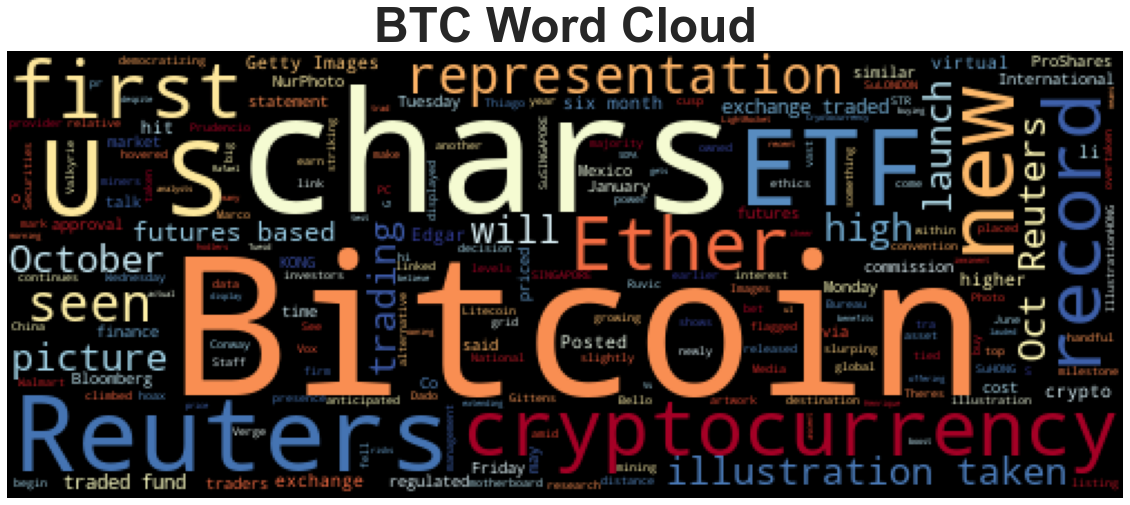

In [65]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(btc_sent["text"].str.cat(),title="BTC Word Cloud")

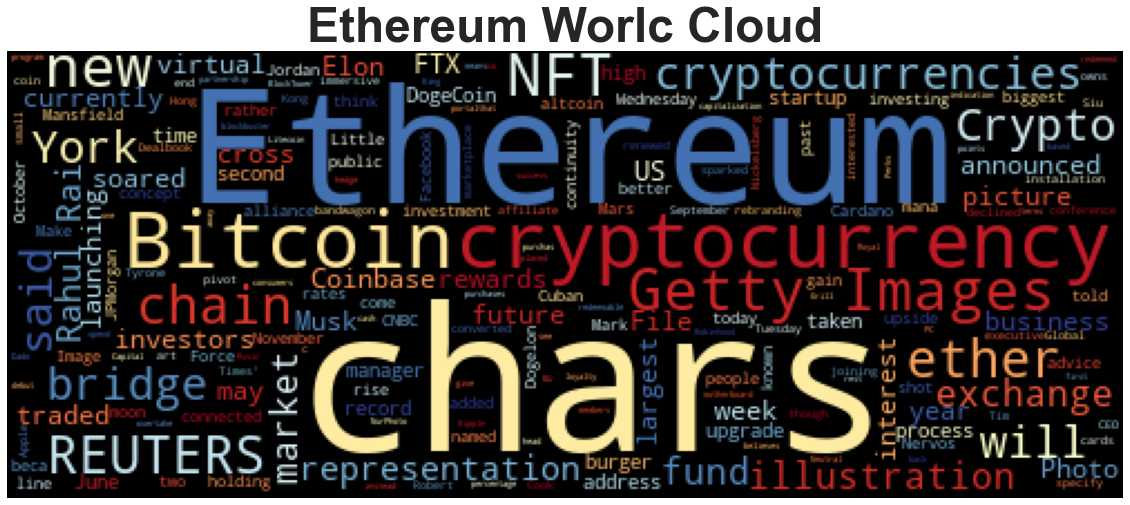

In [66]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(eth_sent["text"].str.cat(),title="Ethereum Worlc Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [69]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-11-12 17:01:20.088277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-11-12 17:01:20.088328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [71]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_txt =btc_sent["text"].str.cat()

In [72]:
# Run the NER processor on all of the text
doc=nlp(bitcoin_txt)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [73]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc,style="ent",jupyter=True)

In [74]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text,ent.label_)

earlier this year DATE
Walmart to Litecoin
 ORG
Verge ORG
Vox Media ORG
Photo Illustration PERSON
Thiago Prudencio/S ORG
U.S. GPE
U.S. GPE
China GPE
Bloomberg GPE
the National Bureau ORG
Bitcoin PERSON
June 29, 2021 DATE
Dado Ruvic/IllustrationHONG KONG PERSON
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
Edgar SuLONDON PERSON
Reuters ORG
Bitcoin PERSON
October 19, 2021 DATE
Reuters ORG
Bitcoin PERSON
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
Bitcoin PERSON
October 18, 2021 DATE
Edgar SuSINGAPORE PERSON
Reuters ORG
six-month DATE
Reuters ORG
SINGAPORE PERSON
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares ORG
Marco Bello PERSON
Getty Images ORG
The Securities and Exchange Commission ORG
Valkyrie PERSON
NurPhoto ORG
>Bloomberg PERSON
first ORDINAL
Rafael Henrique PERSON
Getty Images ORG
Bitcoin PERSON
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
Dogecoin PERSON


---

### Ethereum NER

In [78]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

ethereum_txt =eth_sent["text"].str.cat()

In [79]:
# Run the NER processor on all of the text
doc=nlp(ethereum_txt)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [80]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc,style="ent",jupyter=True)

In [81]:

# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text,ent.label_)

Nervos  PERSON
today DATE
the Force Bridge FAC
Cuban NORP
CNBC ORG
Wednesday DATE
Bitcoin PERSON
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PERSON
0.00000229 MONEY
November 1 DATE
$0.0… MONEY
Getty Images PERSON
the past week DATE
Tim Cook PERSON
The New York Times' Dealbook ORG
Tuesday DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
1-2% PERCENT
Ethereum ORG
NurPhoto ORG
Getty Images ORG
first ORDINAL
Bitcoin, Ethereum ORG
Litecoin PERSON
June 29, 2021 DATE
Burger King ORG
Robinhood ORG
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum ORG
Bitcoin’s ORG
second ORDINAL
chars]NEW YORK GPE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
Thursday

---